    Here, we are having dataset of selling three types of products on the daily basis with daily average price and demand measure with each products unique ID.This data contains records from January 2017 to January 2020, roughly three years.I have applied required statistical as well as analytical methods to extract out as much as possible patterns and meaningful insights.I have also made visualisations using various charts and mathematically measured data using tendency measurements like Covarience,Correlation,Coefficient of variation etc.So, now we are jumping to analysis.

   First, i have imported all the required libraries for exploratory data analysis.Then after loading given dataset in my programme labeling is carried out.Then categorywise data is stored in three different variables.Then i have initialized required lists for making graphs.Then i have performed the most significant operation using for loop.I have calculated monthly average of price data , demand measure and revenue data for each particular caterogy.In the given dataset there was only two important attributes "price" and "demand".So, i have added one extra atribute named revenue measure which is calculated by multiplying average price and demand measure , so that is the measure regarding to daily revenue generated for all entries.And it clearly indicates measure of profit ultimately.

In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ecomData = pd.read_csv('ecom-elasticity-data1.csv', header=None)
ecomData.columns = ["ASIN", "Category", "Date", "Price", "Units Sold", "Month", "Year", "Season", "Revenue"]
# ecomData = np.array(ecomData)

diaperData = ecomData.loc[ecomData['Category'] == 'Diapers']
headphoneData = ecomData.loc[ecomData['Category'] == 'Headphones']
cerealData = ecomData.loc[ecomData['Category'] == 'Cereals']

monthData = ecomData["Month"].unique()
diaperPriceData = []
diaperDemandData = []
diaperRevenueData = []
headphonePriceData = []
headphoneDemandData = []
headphoneRevenueData = []
cerealPriceData = []
cerealDemandData = []
cerealRevenueData = []
cnt = 0
for i in monthData:
    diaperPriceData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Diapers')]['Price'].mean())
    diaperDemandData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Diapers')]['Units Sold'].mean())
    diaperRevenueData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Diapers')]['Revenue'].mean())
    headphonePriceData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Headphones')]['Price'].mean())
    headphoneDemandData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Headphones')]['Units Sold'].mean())
    headphoneRevenueData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Headphones')]['Revenue'].mean())
    cerealPriceData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Cereals')]['Price'].mean())
    cerealDemandData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Cereals')]['Units Sold'].mean())
    cerealRevenueData.append(ecomData.loc[(ecomData['Month'] == i) & (ecomData['Category'] == 'Cereals')]['Revenue'].mean())
    cnt = cnt + 1


Here, i have plotted a line chart taking average monthly revenue of Diaper with respect to months starting from jan 2017 to jan 2020.We can figure out that during march 2017 there was the least revenue and the most during jan 2020.The flow of revenue has increased in a dramatic way by ups and downs , but it is incresed with more proportion over the years. By observing each portion of this line more preceisely,i can conclude that the revenue relatively goes high during January and July month of each year and then it drops down during next months.And this strikes to the very bottom point during march and october months in each year.So, it is neccessary to handle sales and marketing of diapers during these two months with more efforts.Still if we observe yearly growth it is growing reasultanlty but it can grow with more ratio if company handles sales during 3rd and 10th month by setting up discount or other benefits.

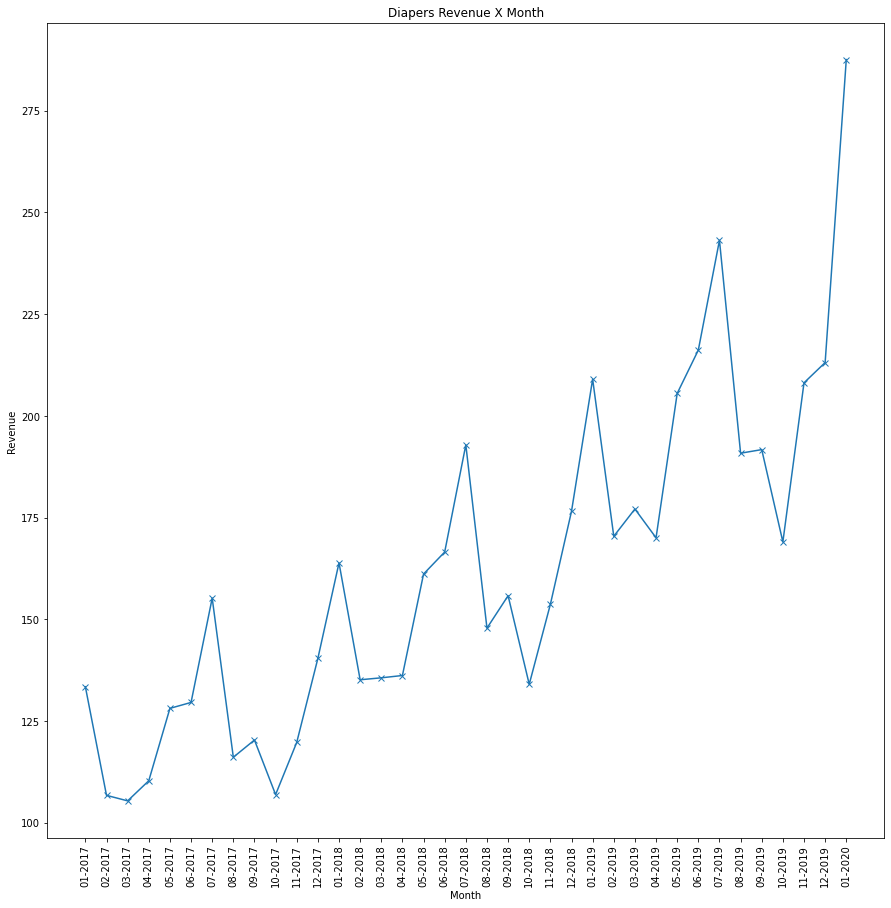

<Figure size 720x720 with 0 Axes>

In [7]:
mpl.rcParams['figure.figsize'] = (15,15)
plt.plot(monthData, diaperRevenueData, marker='x')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Diapers Revenue X Month")
plt.figure(figsize=(10,10))
plt.show()

This is line chart with bar graph which is representing fluctuations in Revenue generated by Headphones over the period in monthly slabs.It shows that the revenue hits the bottom during 3rd and 10th months in each year,so it should be taken cared out in upcoming years.

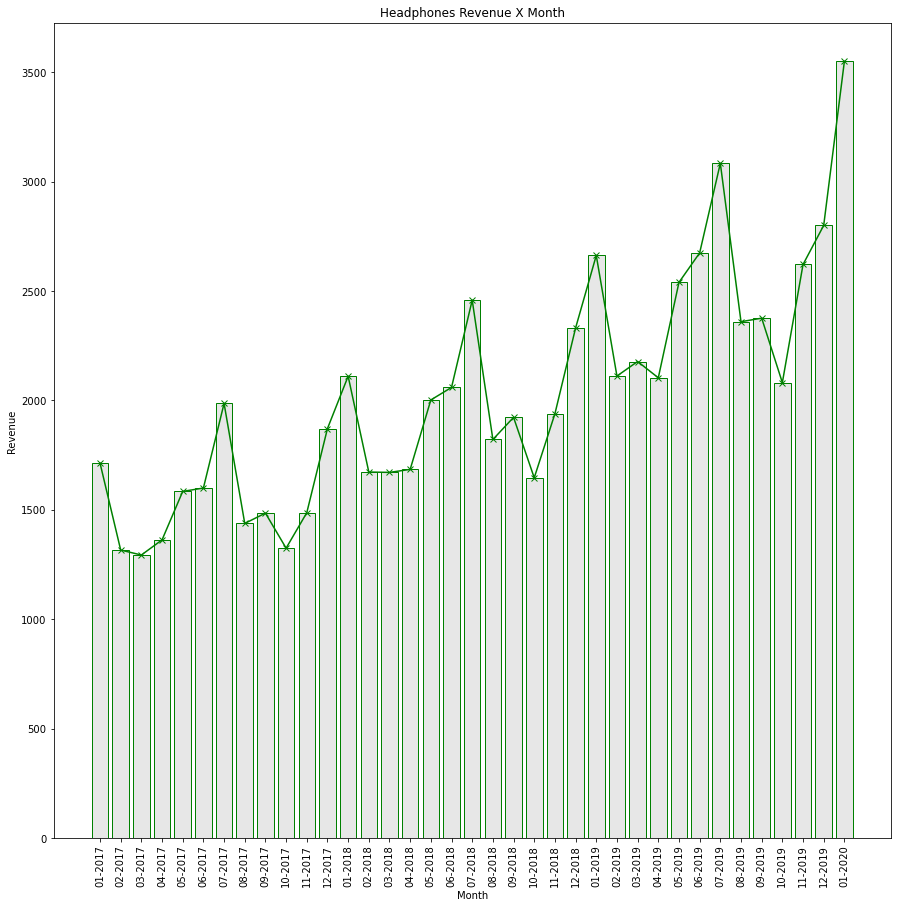

In [13]:
plt.bar(monthData, headphoneRevenueData, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='green')
plt.plot(monthData, headphoneRevenueData, marker='x', color='green')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Headphones Revenue X Month")
plt.show()

Again relatively same type of pattern is observed for generated revenue even with this Cereals sales.So it is highly recommended that company has to focus more during march and october in relative saling to maintain the growth.Company should brought scemes or special discounts during these two months to maintaing business.

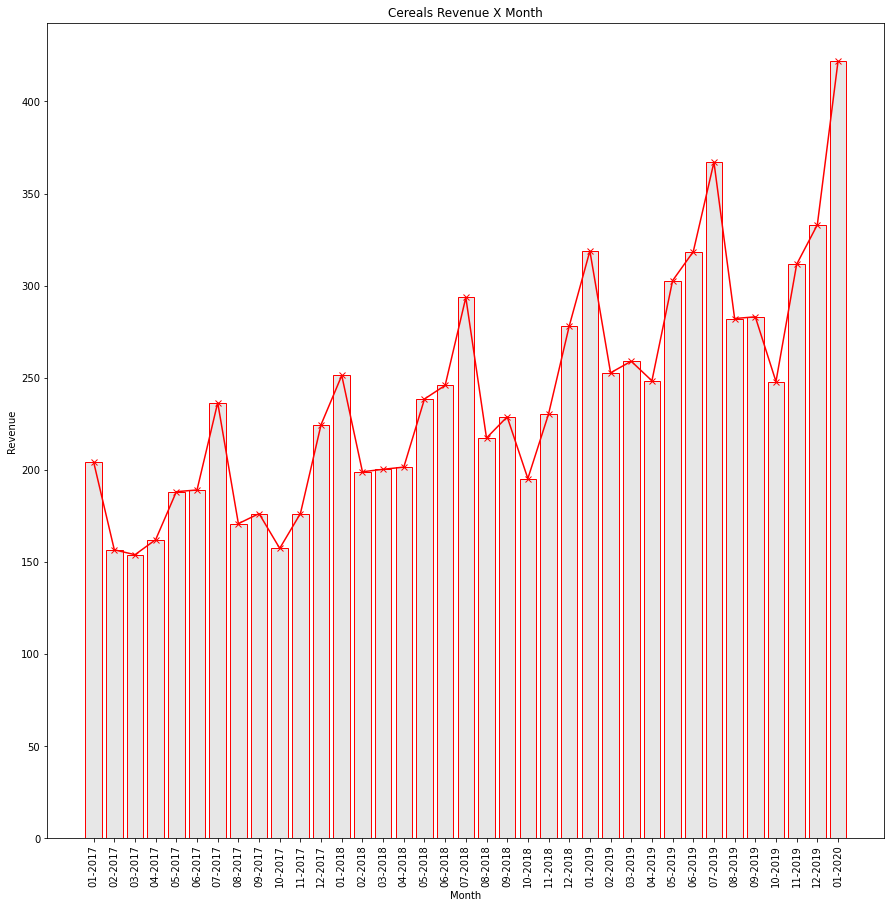

In [14]:
plt.bar(monthData, cerealRevenueData, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red')
plt.plot(monthData, cerealRevenueData, marker='x', color='red')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Cereals Revenue X Month")
plt.show()

Here, is the different type of chart called 'Scatter plot".I have taken average monthly price in Y axis and months on X axis and taken average demand as a radius of these bubbles to represent nature of price and demand combinely with respect to months. We can observe that price is mostly stayed between 8.78 to 8.80 over the period.It looks strange that average price was dropped below 8.76 once during jan 2020 still demand was at its peak during that period.

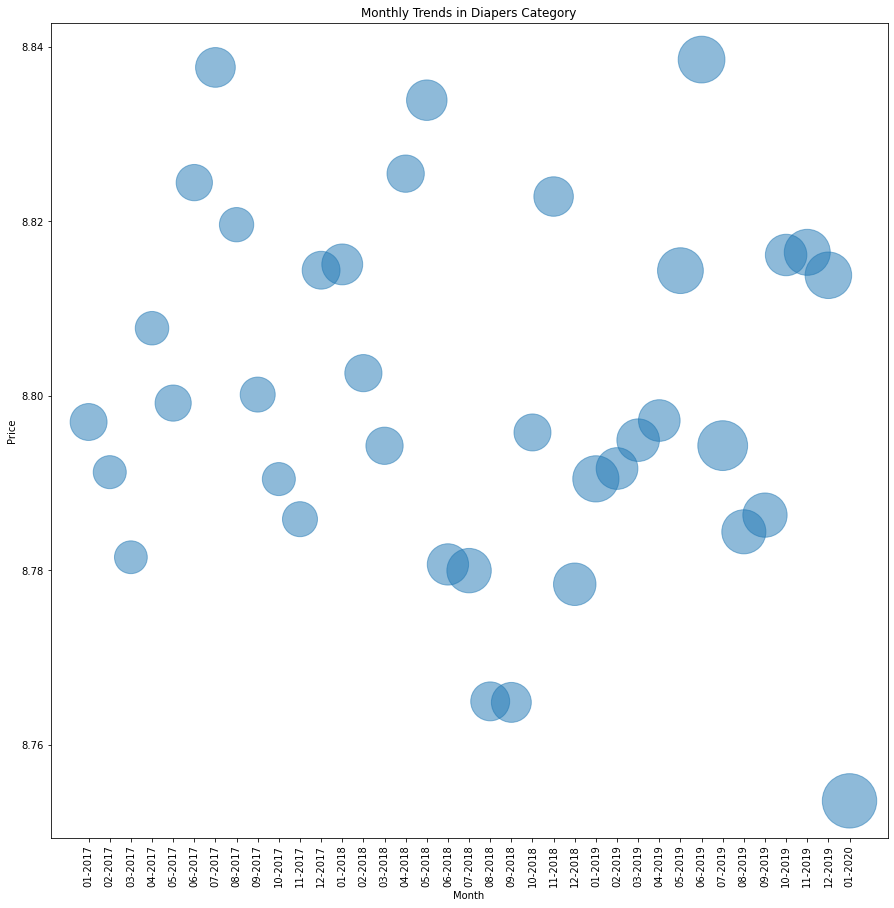

In [8]:
plt.scatter(monthData, diaperPriceData, s = np.array(diaperDemandData)*100, alpha=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Monthly Trends in Diapers Category")
plt.show()

Here,average price of headphones is equivalently scattered bw=etween 70.9 t0 71.1 with relative demand.But during july 2017 price seems like highly dropped still demand was relatively high during that month.

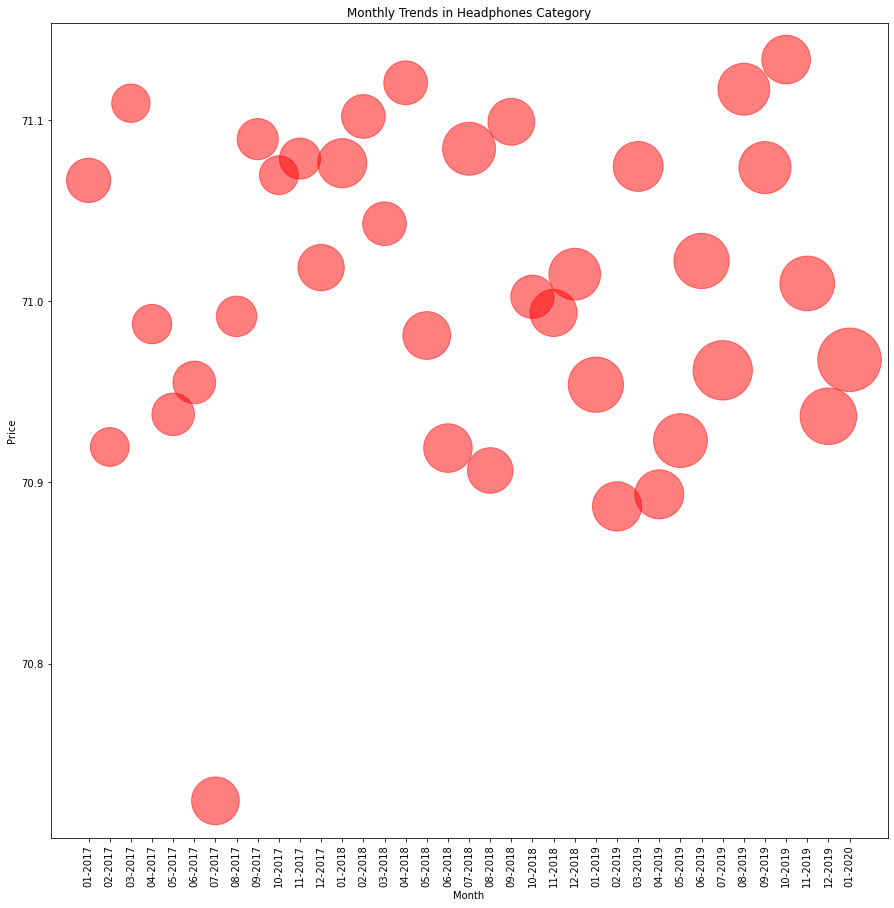

In [9]:
plt.scatter(monthData, headphonePriceData, s = np.array(headphoneDemandData)*100, alpha=0.5,color="red")
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Monthly Trends in Headphones Category")
plt.show()

The price of Cereals was relatively high during April 2017 and low during January 2020 and demand was significalty high during January 2020.In other months it uniformly scattered between 9.99 to 10.01

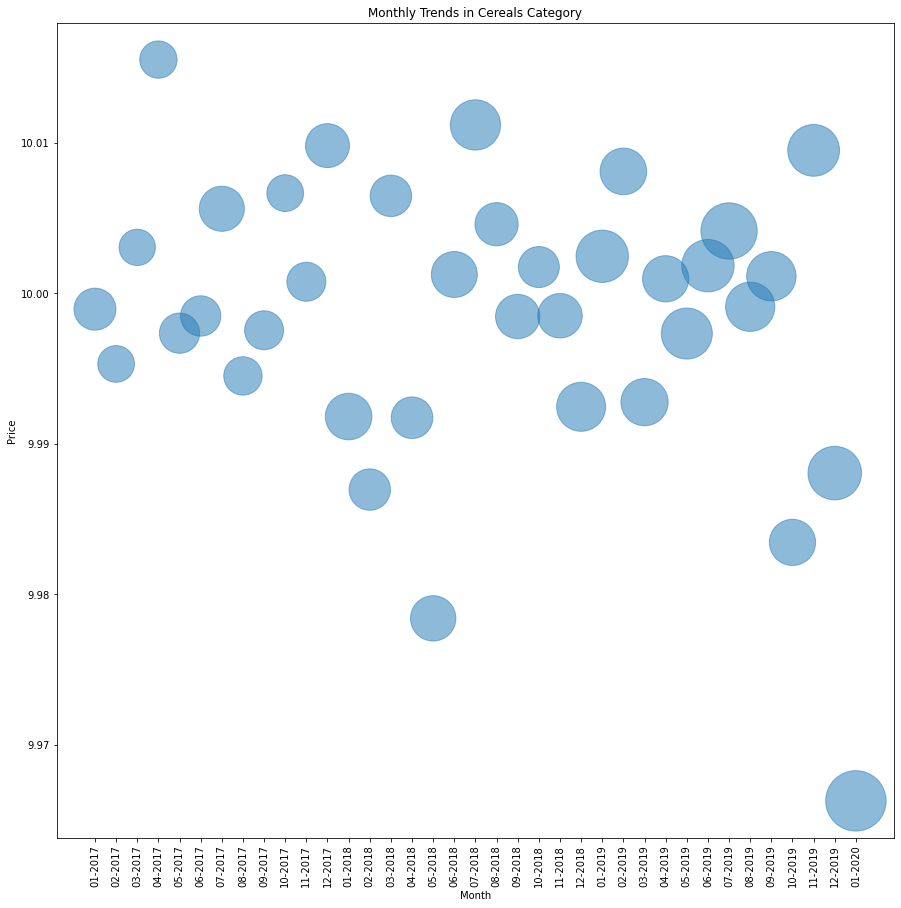

In [17]:
plt.scatter(monthData, cerealPriceData, s = np.array(cerealDemandData)*100, alpha=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Monthly Trends in Cereals Category")
plt.show()

We can track out changes in Diapers price with help of this line chart

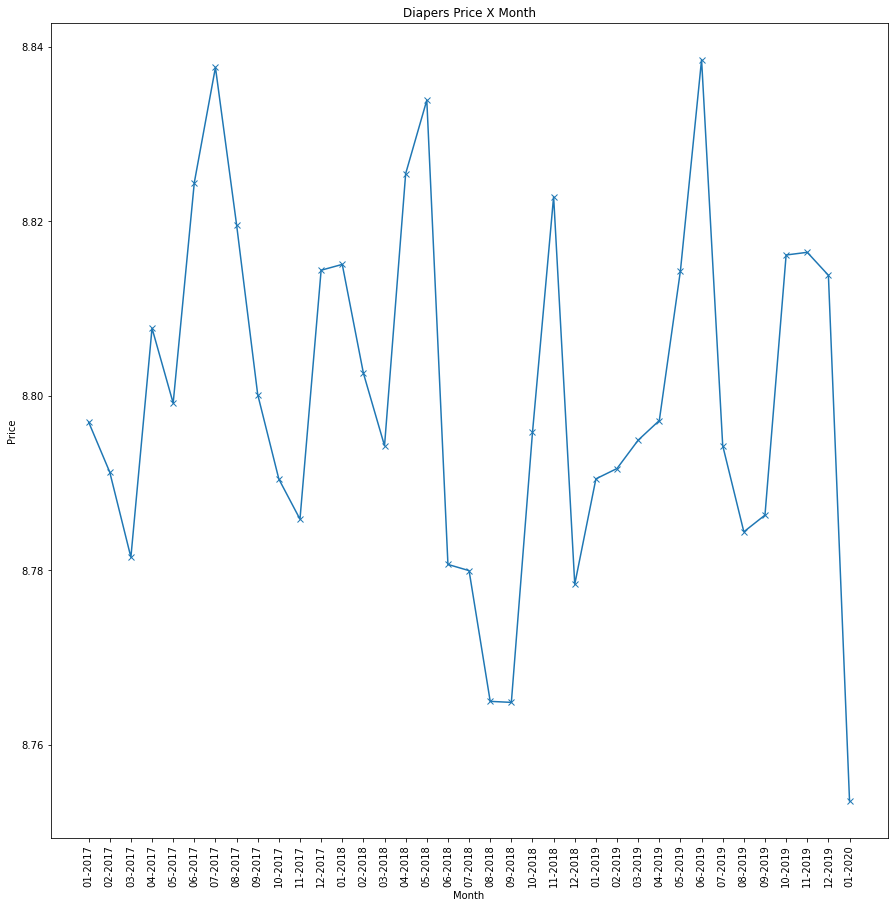

In [18]:
plt.plot(monthData, diaperPriceData, label = "Price", marker='x')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Diapers Price X Month")
plt.show()

Diapers demand is relatively low during march and october months.So, company should accordingly.Demand measure remains very high during january and july months.

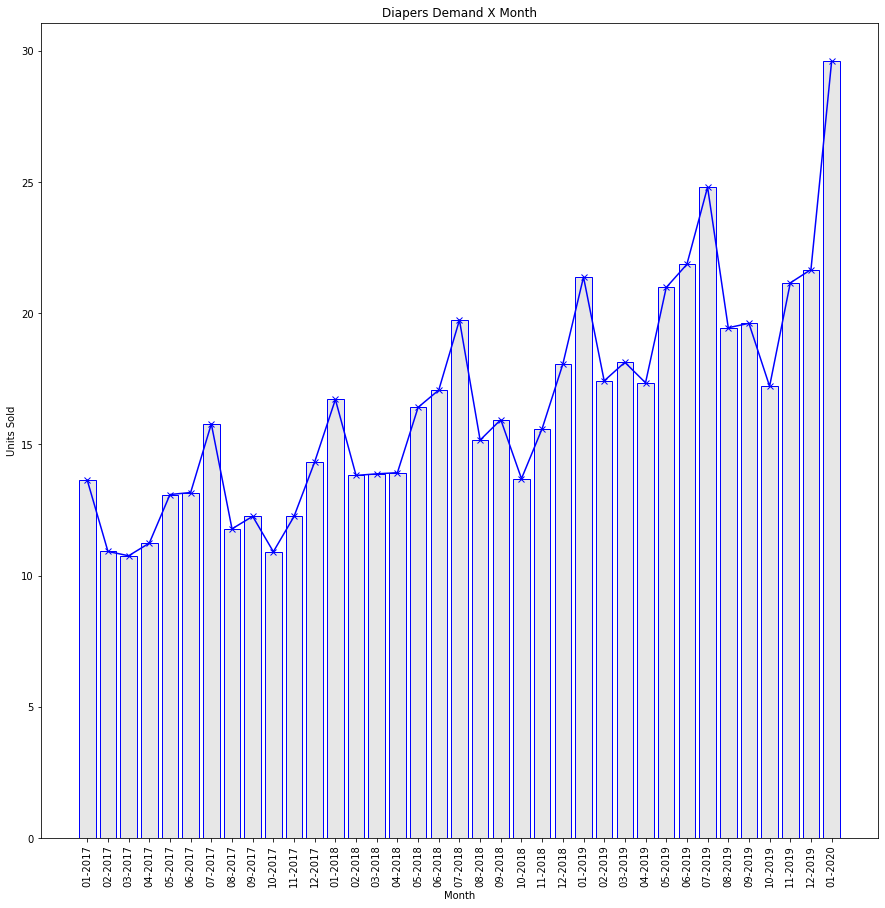

In [19]:
plt.plot(monthData, diaperDemandData, label = "Demand", marker='x', color = 'blue')
plt.bar(monthData, diaperDemandData, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.title("Diapers Demand X Month")
plt.show()

Here, is the nature of Headphones price over the months and which is totally in decentralised manner

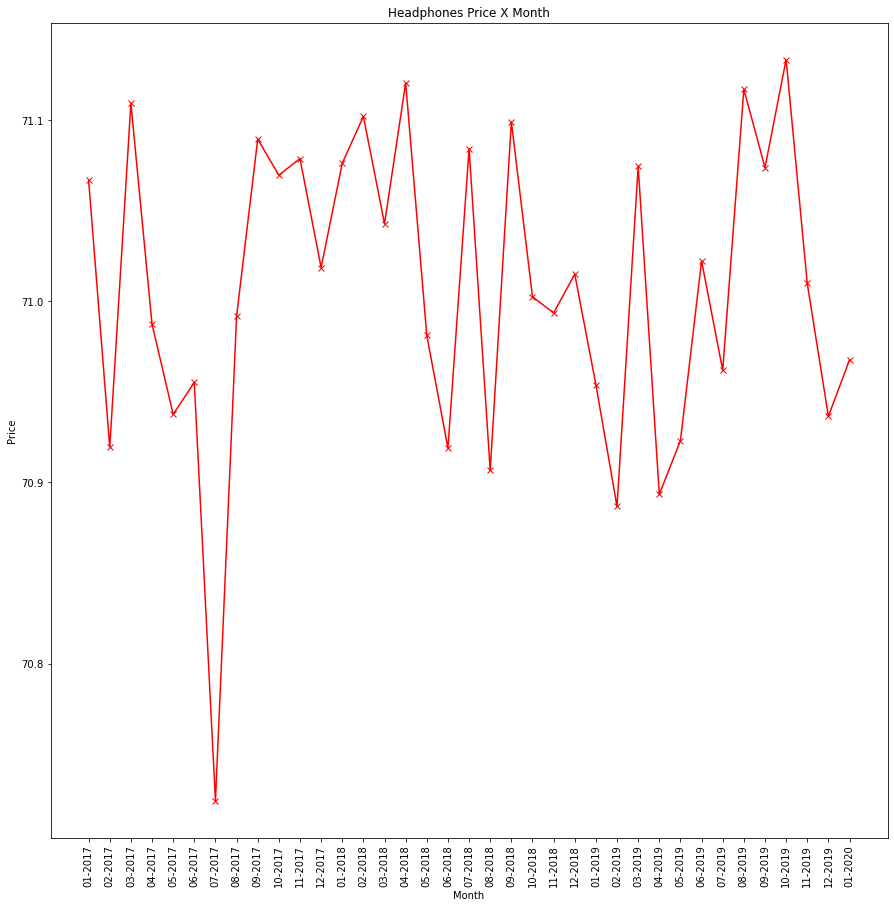

In [20]:
plt.plot(monthData, headphonePriceData, label = "Price", marker='x', color = 'red')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Headphones Price X Month")
plt.show()

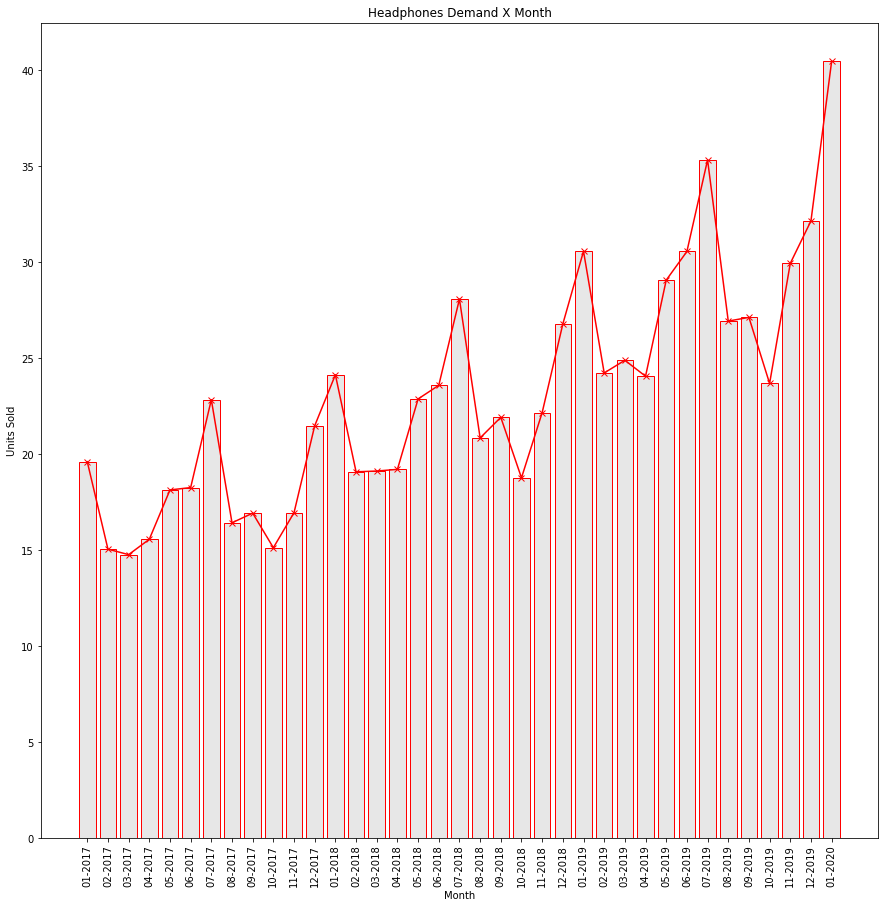

In [21]:
plt.plot(monthData, headphoneDemandData, label = "Demand", marker='x', color = 'red')
plt.bar(monthData, headphoneDemandData, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.title("Headphones Demand X Month")
plt.show()

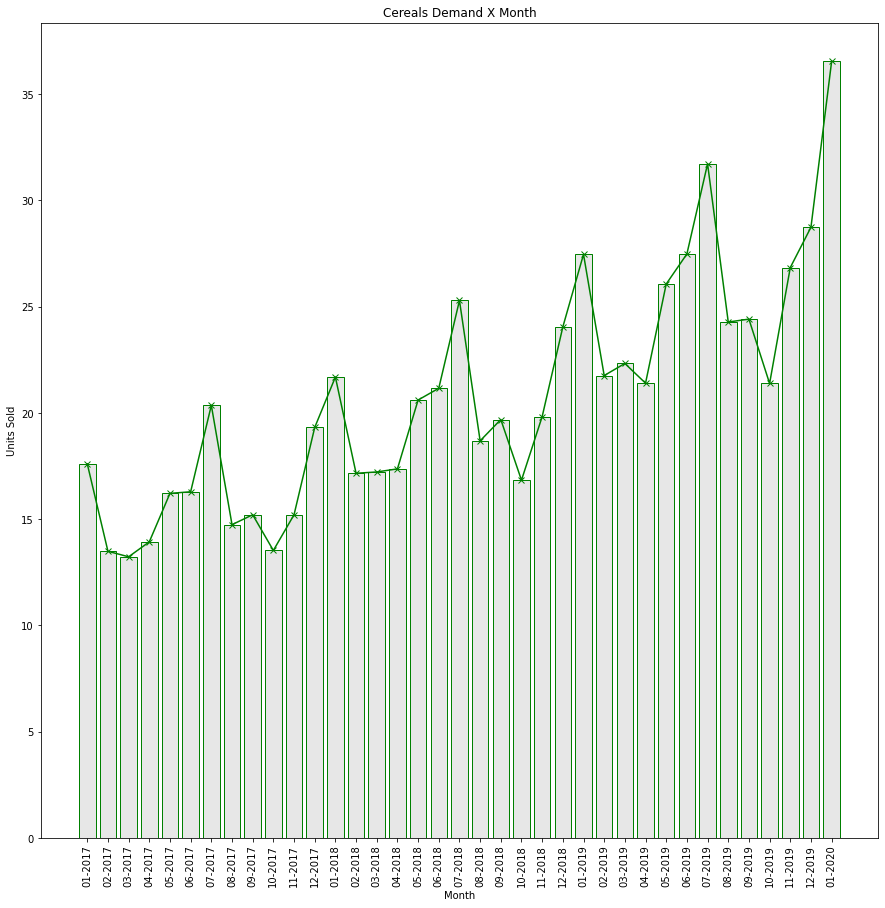

In [22]:
plt.plot(monthData, cerealDemandData, label = "Demand", marker='x', color = 'green')
plt.bar(monthData, cerealDemandData, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='green')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.title("Cereals Demand X Month")
plt.show()

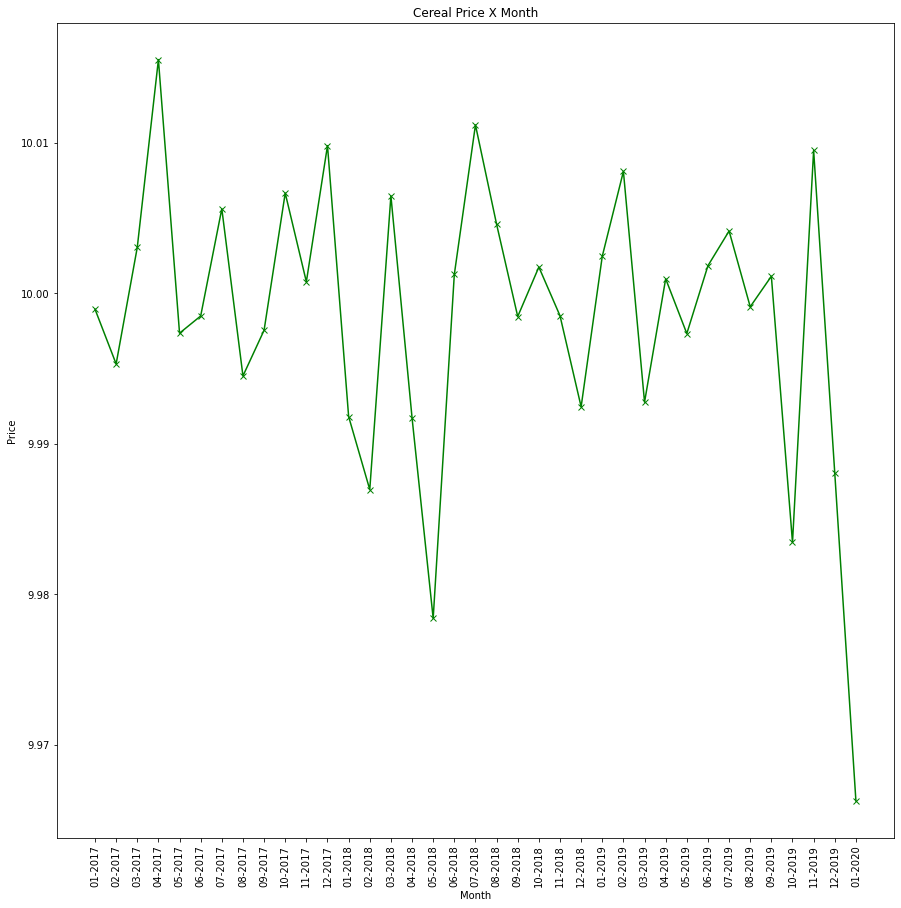

In [23]:
plt.plot(monthData, cerealPriceData, label = "Price", marker='x', color = 'green')
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Cereal Price X Month")
plt.show()


Below is the scattter graphs of all categories separatedly with gridlines.They are made to check pattern in demand across the range of price.We can find one more insight by following graph, In Headphones category the points are located relatively far from each other while in cereals points are relatively condensed so we can predict that these two measures are less varible in cereals category compare to headphones category which means the sales statistics of cereals category is more stable than that of headphone category.

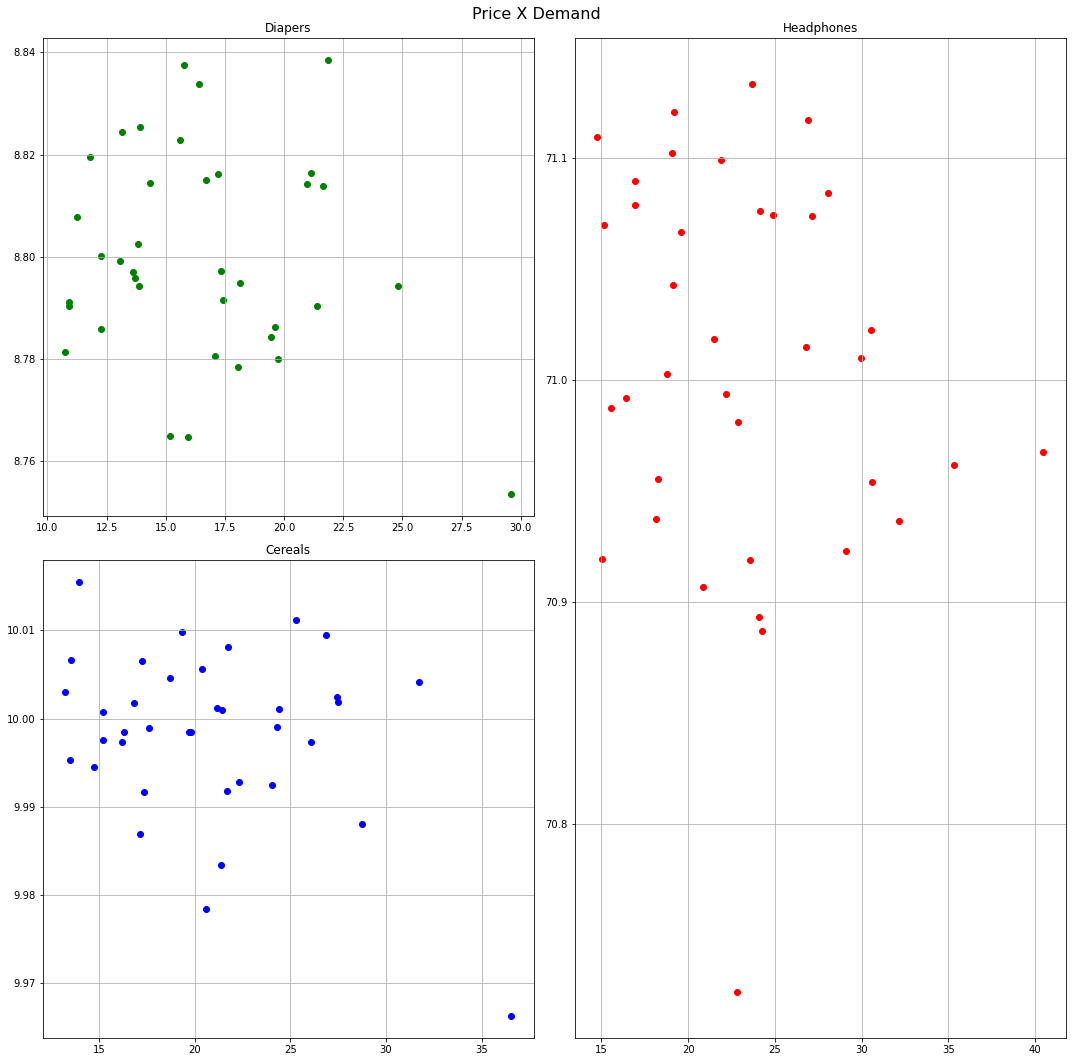

In [26]:
plot1 = plt.subplot2grid((2, 2), (0, 0))
plot2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
plot3 = plt.subplot2grid((2, 2), (1, 0))
plot1.scatter(diaperDemandData, diaperPriceData, color = "green")
plot1.grid()
plot1.set_title('Diapers')
plot2.scatter(headphoneDemandData, headphonePriceData, color = "red")
plot2.grid()
plot2.set_title('Headphones')
plot3.scatter(cerealDemandData, cerealPriceData, color = "blue")
plot3.grid()
plot3.set_title('Cereals')
plt.suptitle('Price X Demand', fontsize=16)
plt.tight_layout()
plt.show()

This pie graph is presenting propotional level of each category's demand measure over the period of three years.

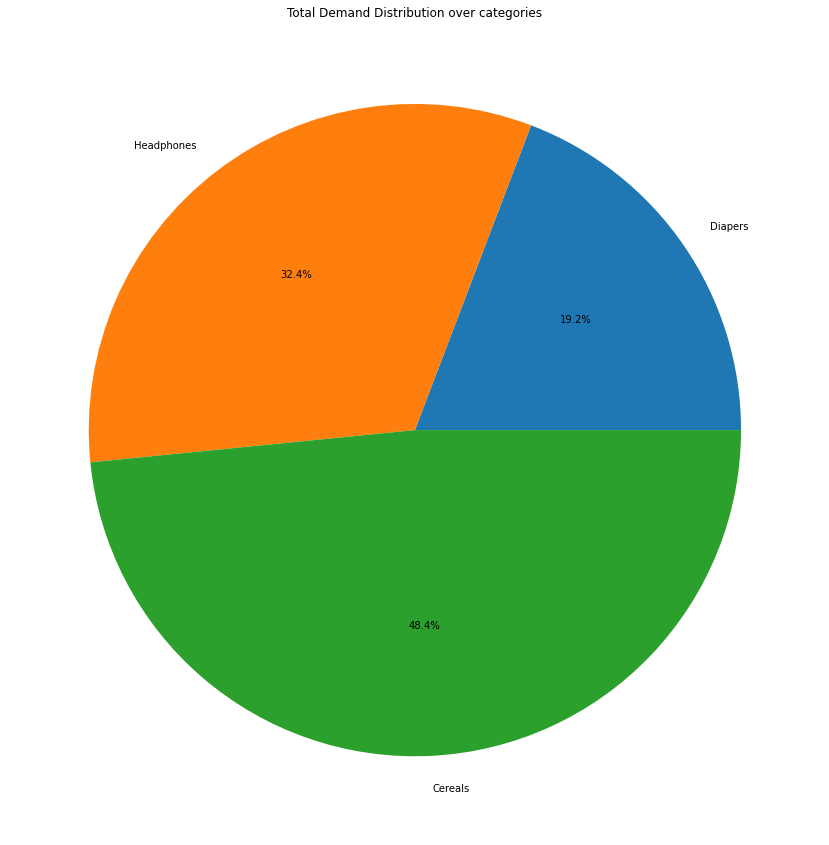

In [58]:
totaldiaperdemand = ecomData.loc[(ecomData['Category'] == 'Diapers')]['Units Sold'].sum()
totalheadphonedemand = ecomData.loc[(ecomData['Category'] == 'Headphones')]['Units Sold'].sum()
totalcerealdemand = ecomData.loc[(ecomData['Category'] == 'Cereals')]['Units Sold'].sum()

totaldemand = np.array([totaldiaperdemand, totalheadphonedemand, totalcerealdemand])

mylabels = ["Diapers", "Headphones", "Cereals"]
plt.pie(totaldemand, labels = mylabels,autopct='%1.1f%%')
plt.title('Total Demand Distribution over categories')
plt.show()


Here is the stacked bar graph which is clearly representing comarisonal growth of all three category products demand over the three years.

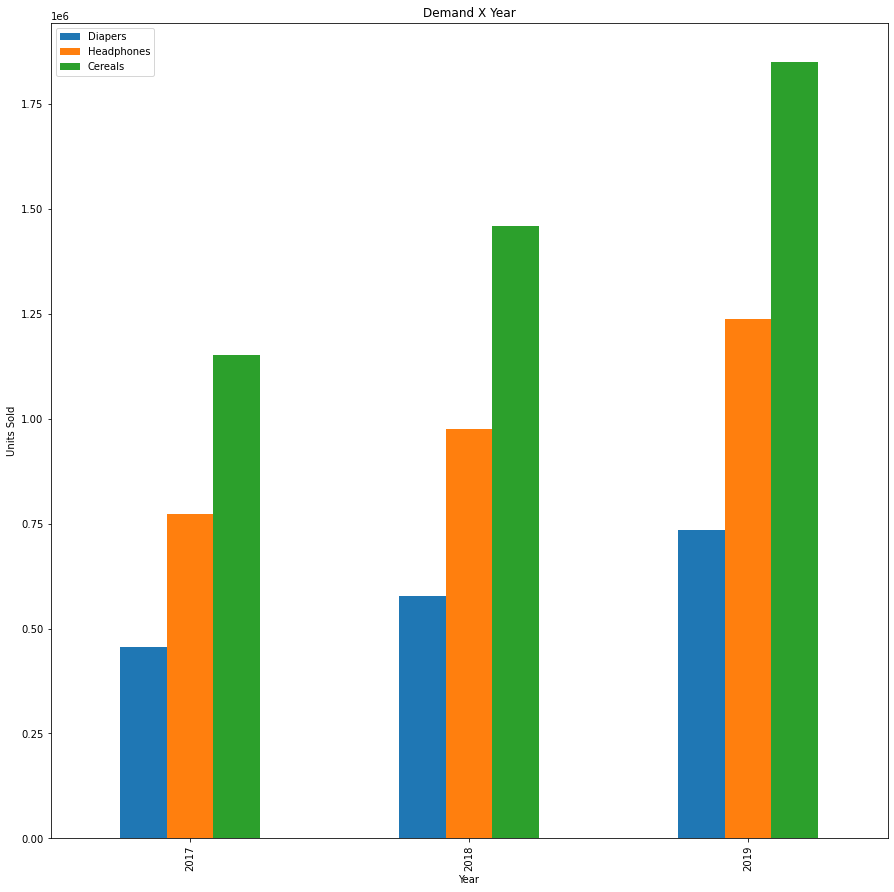

In [29]:


diaperdemand17 = ecomData.loc[(ecomData['Year'] == 2017) & (ecomData['Category'] == 'Diapers')]['Units Sold'].sum()
headphonedemand17 = ecomData.loc[(ecomData['Year'] == 2017) & (ecomData['Category'] == 'Headphones')]['Units Sold'].sum()
cerealdemand17 = ecomData.loc[(ecomData['Year'] == 2017) & (ecomData['Category'] == 'Cereals')]['Units Sold'].sum()
totaldemand17 = ecomData.loc[(ecomData['Year'] == 2017)]['Units Sold'].sum()

diaperdemand18 = ecomData.loc[(ecomData['Year'] == 2018) & (ecomData['Category'] == 'Diapers')]['Units Sold'].sum()
headphonedemand18 = ecomData.loc[(ecomData['Year'] == 2018) & (ecomData['Category'] == 'Headphones')]['Units Sold'].sum()
cerealdemand18 = ecomData.loc[(ecomData['Year'] == 2018) & (ecomData['Category'] == 'Cereals')]['Units Sold'].sum()
totaldemand18 = ecomData.loc[(ecomData['Year'] == 2018)]['Units Sold'].sum()

diaperdemand19 = ecomData.loc[(ecomData['Year'] == 2019) & (ecomData['Category'] == 'Diapers')]['Units Sold'].sum()
headphonedemand19 = ecomData.loc[(ecomData['Year'] == 2019) & (ecomData['Category'] == 'Headphones')]['Units Sold'].sum()
cerealdemand19 = ecomData.loc[(ecomData['Year'] == 2019) & (ecomData['Category'] == 'Cereals')]['Units Sold'].sum()
totaldemand19 = ecomData.loc[(ecomData['Year'] == 2019)]['Units Sold'].sum()

plotdata = pd.DataFrame({

    "Diapers":[int(diaperdemand17), int(diaperdemand18), int(diaperdemand19)],

    "Headphones":[int(headphonedemand17), int(headphonedemand18), int(headphonedemand19)],

    "Cereals":[int(cerealdemand17), int(cerealdemand18), int(cerealdemand19)]},

    index=["2017", "2018", "2019"])

plotdata.plot(kind="bar")
plt.title("Demand X Year")
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.show()

Here,I have grouped months roughly seasonwise to extract further meaningful insights about seasonal sales.For that i have grouped january 2017 to march 2017 as "Winter 1",April 2017 to 9 june 2017 as "Summer 1" and 10 June 2017 to October 2017 as "Monsoon 1",November 2017 to March 2018 as "Winter 2" and so on.By doing this we can find that if any particular category product has high demand or price during some specific season or not.As far as concern of diapers i cannot see any seasonal trends across the fluctucaiton of prices.

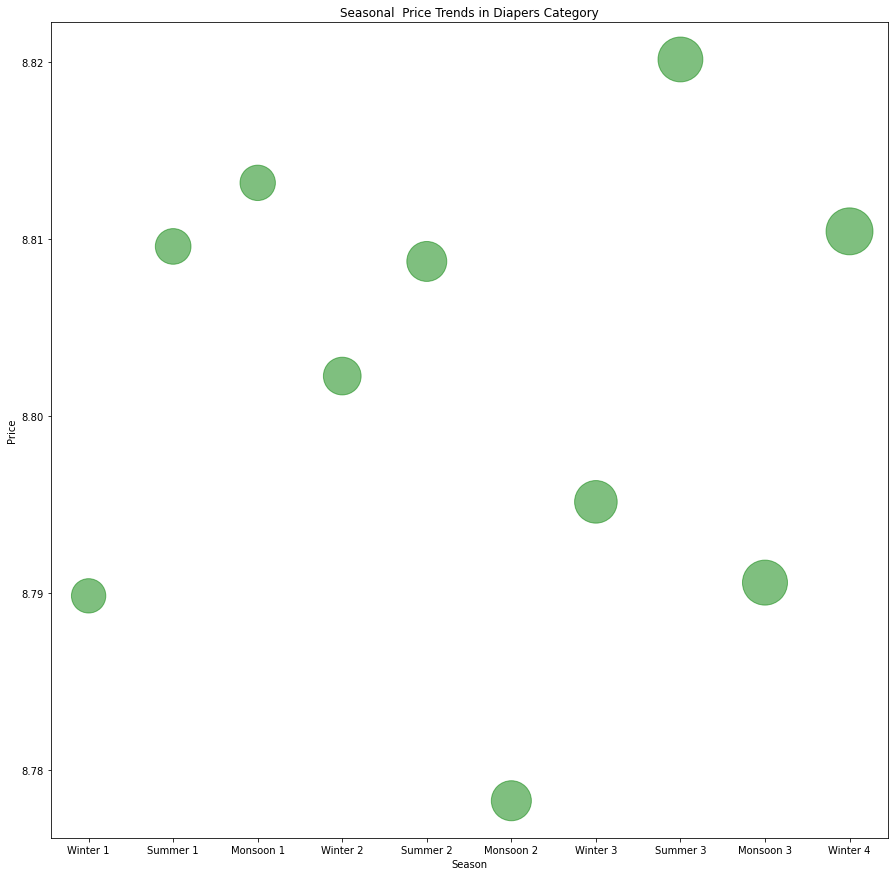

In [59]:
seasonData = ecomData["Season"].unique()
diaperPriceData = []
diaperDemandData = []
headphonePriceData = []
headphoneDemandData = []
cerealPriceData = []
cerealDemandData = []
cnt = 0
for i in seasonData:
    diaperPriceData.append(ecomData.loc[(ecomData['Season'] == i) & (ecomData['Category'] == 'Diapers')]['Price'].mean())
    diaperDemandData.append(ecomData.loc[(ecomData['Season'] == i) & (ecomData['Category'] == 'Diapers')]['Units Sold'].mean())
    headphonePriceData.append(ecomData.loc[(ecomData['Season'] == i) & (ecomData['Category'] == 'Headphones')]['Price'].mean())
    headphoneDemandData.append(ecomData.loc[(ecomData['Season'] == i) & (ecomData['Category'] == 'Headphones')]['Units Sold'].mean())
    cerealPriceData.append(ecomData.loc[(ecomData['Season'] == i) & (ecomData['Category'] == 'Cereals')]['Price'].mean())
    cerealDemandData.append(ecomData.loc[(ecomData['Season'] == i) & (ecomData['Category'] == 'Cereals')]['Units Sold'].mean())
    cnt = cnt + 1

plt.scatter(seasonData, diaperPriceData, s = np.array(diaperDemandData)*100, alpha=0.5,color="green")
plt.xlabel("Season")
plt.ylabel("Price")
plt.title("Seasonal  Price Trends in Diapers Category")
plt.show()

By looking at graph i can say that prices of headphone category products have high chances to be dropped during summer season beacuse in Summer 1 and Summer 3 prices were significantly dropped.So,the customers who don't have ergent requirement might think to buy during summer season.In Summer 3 prices was low so demand was significantly higher but in winter 4 even the price was relatively high still demand is more than summer 3 and this pattern shows that overall trust of consumers has build over the time and overall people found worth of their money.

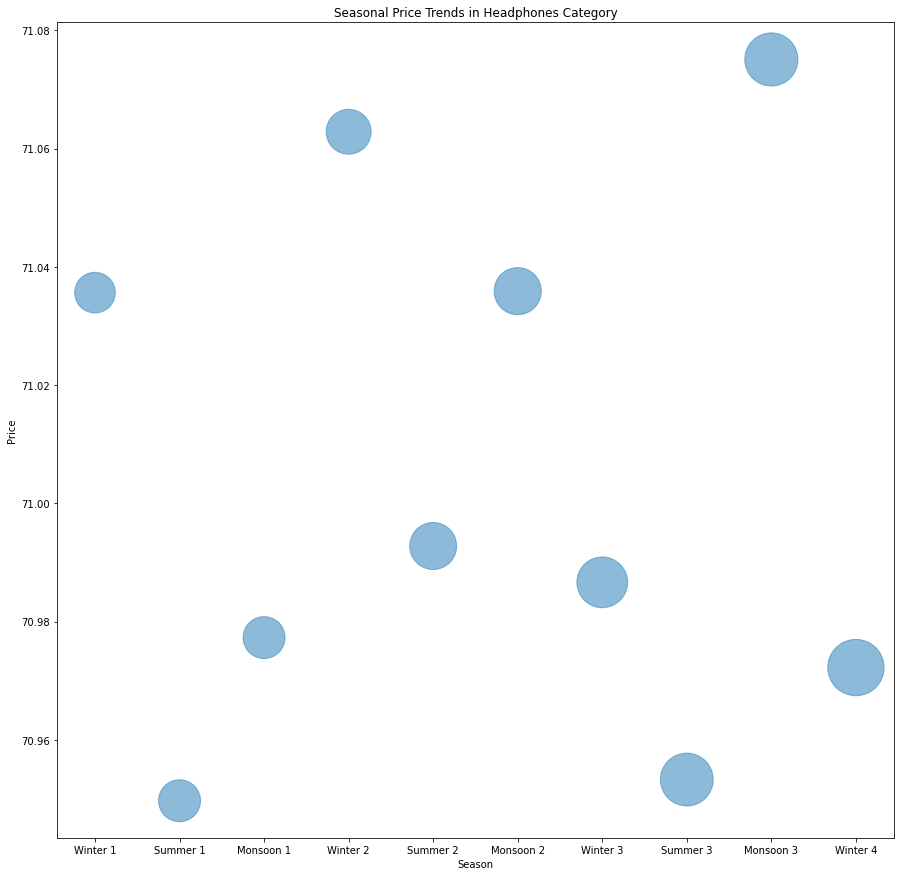

In [35]:
plt.scatter(seasonData, headphonePriceData, s = np.array(headphoneDemandData)*100, alpha=0.5)
plt.xlabel("Season")
plt.ylabel("Price")
plt.title("Seasonal Price Trends in Headphones Category")
plt.show()

In [ ]:
There is not such a significant meaningful pattern which can be recognized across price of Cereals category.

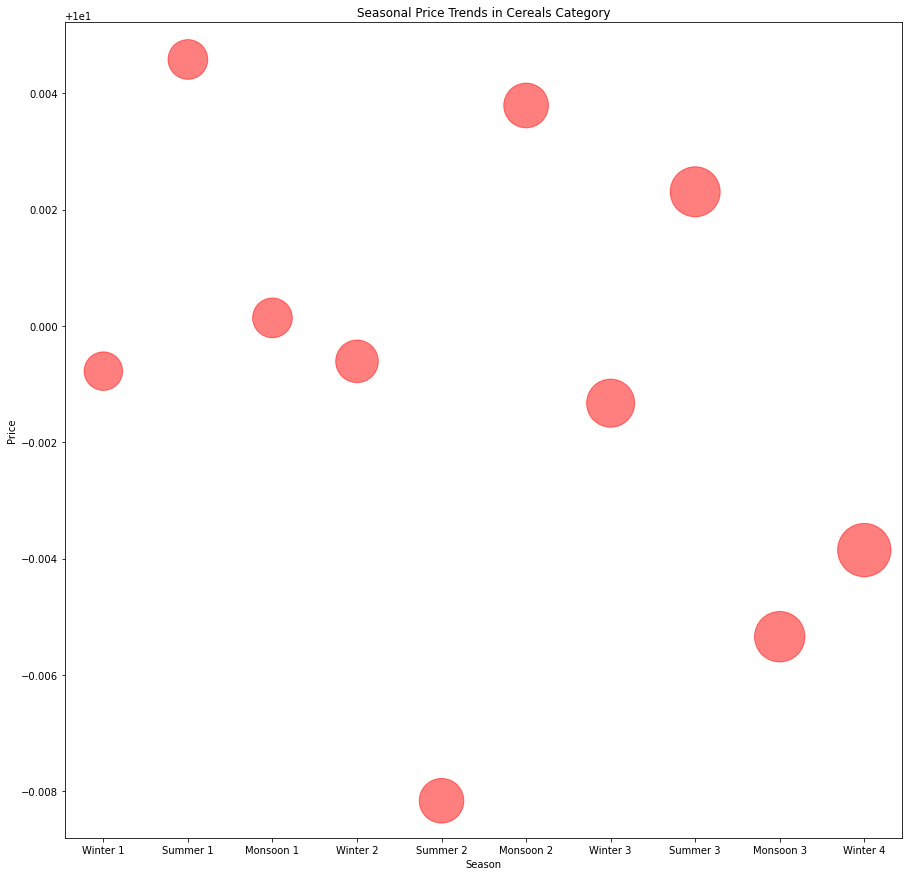

In [60]:
plt.scatter(seasonData, cerealPriceData, s = np.array(cerealDemandData)*100, alpha=0.5,color="red")
plt.xlabel("Season")
plt.ylabel("Price")
plt.title("Seasonal Price Trends in Cereals Category")
plt.show()

In the data analysis statistical tendency measurements are very important to reach towards any conclusion in a rational manner.
So,here i have measured probability of any month's price be  greater than the mean of all time prices.Then mean gives overall idea of price throughout three yeras.Standard deviation is the measure of variability which gives idea about how much fluctuating the data is in nature that is ultimately root mean square.Coefficient of variation is ratio of standard deviation with respect to mean.Correlation measures actually how much dependent are two random variables on each other.And they are correlated positively or negatively.The more the value the more the dependability on each other.

In [66]:
diapers_price = ecomData.loc[(ecomData['Category'] == "Diapers")]['Price']
diapers_demand = ecomData.loc[(ecomData['Category'] == "Diapers")]['Units Sold']
diapers_sd = np.std(diapers_price.tolist())

diapers_mean = ecomData.loc[(ecomData['Category'] == "Diapers")]['Price'].mean()

diapers_coeff_v = diapers_sd / diapers_mean

print("Diapers category price statistical analyis\n")
diapers_corr, _ = pearsonr(diapers_price, diapers_demand)

diapers_great_avg = ecomData.loc[(ecomData['Category'] == "Diapers") & (ecomData['Price'] > diapers_mean)]['Price'].count()
diapers_prob = diapers_great_avg / len(diapers_price)
print(f"Probability of having greater than mean price at any month : {diapers_prob}\n")
print(f"Coeficient of Variation :{diapers_coeff_v}\n")
print(f"Standard Deviation of Diapers Price is : {diapers_sd}\n")
print(f"Average Price of Diapers :{diapers_mean}\n")
print(f"Correlation between price and demand {diapers_corr}\n")

Diapers category price statistical analyis

Probability of having greater than mean price at any month : 0.44376363636363636

Coeficient of Variation :0.20288463550395208

Standard Deviation of Diapers Price is : 1.7856040369495427

Average Price of Diapers :8.801080636363714

Correlation between price and demand 0.5036957603661709



Here, by observing all these values of three categories we can conclude many meaningful results.Like diaper category has the least Correlation value among all of three so price and demand in that category is loosely corelated with each other.

In [67]:
headphone_price = ecomData.loc[(ecomData['Category'] == "Headphones")]['Price']
headphone_demand = ecomData.loc[(ecomData['Category'] == "Headphones")]['Units Sold']
headphones_sd = np.std(headphone_price.tolist())
headphones_mean = ecomData.loc[(ecomData['Category'] == "Headphones")]['Price'].mean()
headphones_cv = headphones_sd / headphones_mean
headphones_covari = np.cov(headphone_price, headphone_demand)
print("Headphones category price statistical analyis\n")
headphones_corr, _ = pearsonr(headphone_price, headphone_demand)
headphones_great_avg = ecomData.loc[(ecomData['Category'] == "Headphones") & (ecomData['Price'] > headphones_mean)]['Price'].count()
headphones_prob = headphones_great_avg / len(headphone_price)
print(f"Probability of having greater than mean price at any time : {headphones_prob}\n")
print(f"Coeficient of Variation :{headphones_cv}\n")
print(f"Standard Deviation of Diapers Price is : {headphones_sd}\n")
print(f"Average Price of Diapers :{headphones_mean}\n")
print(f"Correlation between price and demand {headphones_corr}\n")

Headphones category price statistical analyis

Probability of having greater than mean price at any time : 0.3053863636363636

Coeficient of Variation :0.28208298177928876

Standard Deviation of Diapers Price is : 20.030068168863398

Average Price of Diapers :71.00771568181877

Correlation between price and demand 0.7231635474154545



Among all three Cereal category is having the least coefficient of variation value which is 0.19 something so that is the most stable category with respect to price.

In [63]:

cereal_price = ecomData.loc[(ecomData['Category'] == "Cereals")]['Price']
cereal_demand = ecomData.loc[(ecomData['Category'] == "Cereals")]['Units Sold']
cereals_sd = np.std(cereal_price.tolist())
cereals_mean = ecomData.loc[(ecomData['Category'] == "Cereals")]['Price'].mean()
cereals_cv = cereals_sd / cereals_mean
cereals_covari = np.cov(cereal_price, cereal_demand)
print("Cereals category price statistical analyis\n")
cereals_corr, _ = pearsonr(cereal_price, cereal_demand)
cereals_great_avg = ecomData.loc[(ecomData['Category'] == "Cereals") & (ecomData['Price'] > diapers_mean)]['Price'].count()
cereals_prob = cereals_great_avg / len(cereal_price)
print(f"Probability of having greater than mean price at any time : {cereals_prob}\n")
print(f"Coeficient of Variation :{cereals_cv}\n")
print(f"Standard Deviation of Diapers Price is : {cereals_sd}\n")
print(f"Average Price of Diapers :{cereals_mean}\n")
print(f"Correlation between price and demand {cereals_corr}\n")

Cereals category price statistical analyis
Probability of having greater than mean price at any time : 0.7526227272727273

Coeficient of Variation :0.1970002820110099

Standard Deviation of Diapers Price is : 1.9698405456050865

Average Price of Diapers :9.999176272727349

Correlation between price and demand 0.7242914433164489



I have made pictorial representation to beautifully compare all three categories part in total revenue on yearly basis.And it can be seen that headphones category has contributed signifacantly high during 2017 and 2018,while during 2019 almost all the revenue is only generated by cereals category products.

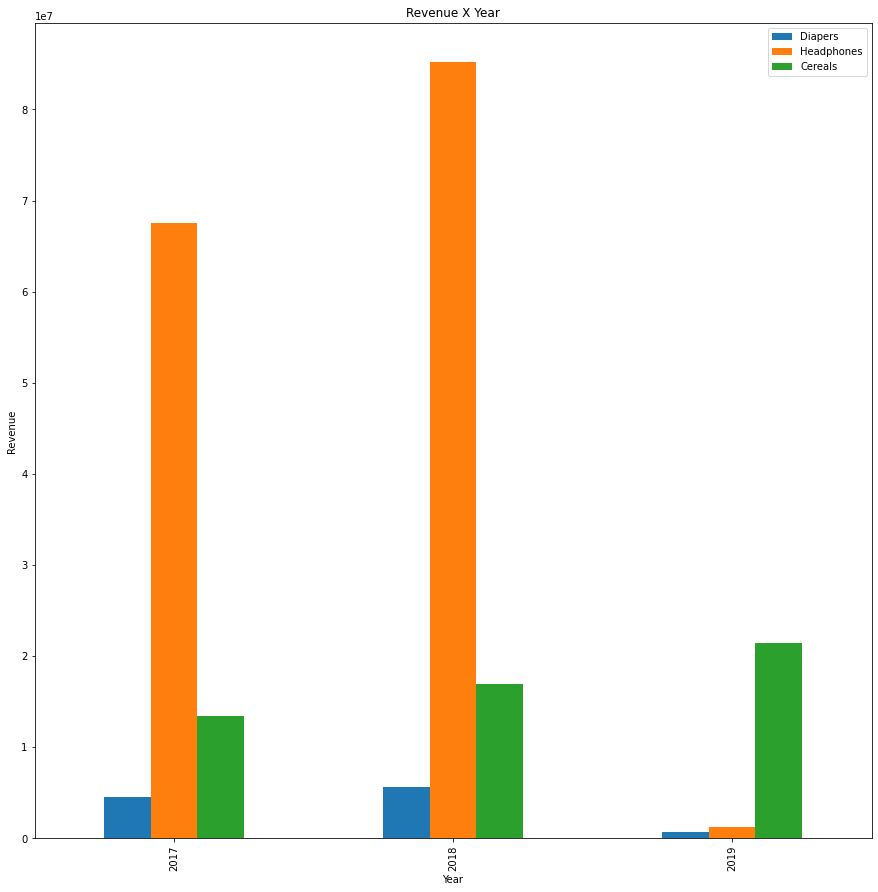

In [47]:
diaperrevenue17 = ecomData.loc[(ecomData['Year'] == 2017) & (ecomData['Category'] == 'Diapers')]['Revenue'].sum()
headphonerevenue17 = ecomData.loc[(ecomData['Year'] == 2017) & (ecomData['Category'] == 'Headphones')]['Revenue'].sum()
cerealrevenue17 = ecomData.loc[(ecomData['Year'] == 2017) & (ecomData['Category'] == 'Cereals')]['Revenue'].sum()

diaperrevenue18 = ecomData.loc[(ecomData['Year'] == 2018) & (ecomData['Category'] == 'Diapers')]['Revenue'].sum()
headphonerevenue18 = ecomData.loc[(ecomData['Year'] == 2018) & (ecomData['Category'] == 'Headphones')]['Revenue'].sum()
cerealrevenue18 = ecomData.loc[(ecomData['Year'] == 2018) & (ecomData['Category'] == 'Cereals')]['Revenue'].sum()

diaperrevenue19 = ecomData.loc[(ecomData['Year'] == 2019) & (ecomData['Category'] == 'Diapers')]['Revenue'].sum()
headphonerevenue19 = ecomData.loc[(ecomData['Year'] == 2019) & (ecomData['Category'] == 'Headphones')]['Revenue'].sum()
cerealrevenue19 = ecomData.loc[(ecomData['Year'] == 2019) & (ecomData['Category'] == 'Cereals')]['Revenue'].sum()
#
plotdata = pd.DataFrame({

    "Diapers":[int(diaperrevenue17), int(diaperrevenue18), int(diaperdemand19)],

    "Headphones":[int(headphonerevenue17), int(headphonerevenue18), int(headphonedemand19)],

    "Cereals":[int(cerealrevenue17), int(cerealrevenue18), int(cerealrevenue19)]},

    index=["2017", "2018", "2019"])

plotdata.plot(kind="bar")
plt.title("Revenue X Year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

Below Pie graph is representing the propotional contribution of all three categories in total generated revenue over three years.And headphones category is the first and with 79.1% of total revenue and cereals category is second with 15.7% while diapers category is contributing a little portion of 5.3%.

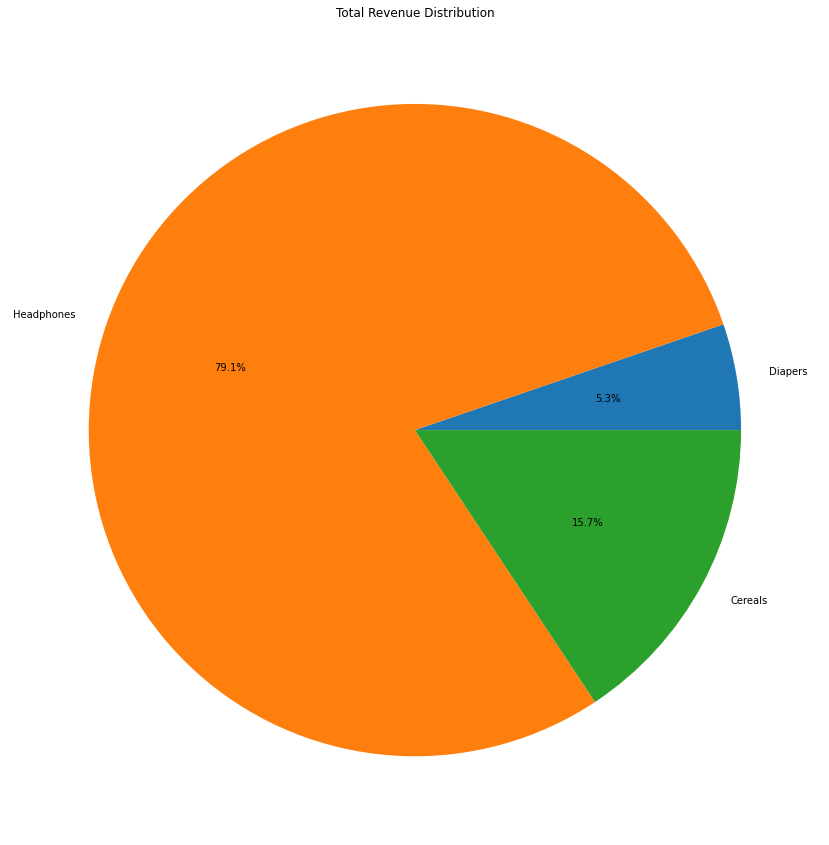

In [57]:

totaldiaperrevenue = ecomData.loc[(ecomData['Category'] == 'Diapers')]['Revenue'].sum()
totalheadphonerevenue = ecomData.loc[(ecomData['Category'] == 'Headphones')]['Revenue'].sum()
totalcerealrevenue = ecomData.loc[(ecomData['Category'] == 'Cereals')]['Revenue'].sum()

totalrevenue = np.array([totaldiaperrevenue, totalheadphonerevenue, totalcerealrevenue])

revenuelabels = ["Diapers", "Headphones", "Cereals"]
plt.pie(totalrevenue, labels = mylabels,autopct='%1.1f%%')
plt.title('Total Revenue Distribution')
plt.show()

Following are the boxplots of all three category prices.It gives an ultimate idea of porportion distribution with respect to mean price as well as other quartiles.Lower quartile value indicates that 25% entries among total are having less value then that point and Upper quartile indicates that 25% entries among total are having high value then that point.So it gives a price distribution idea in a very different manner.  

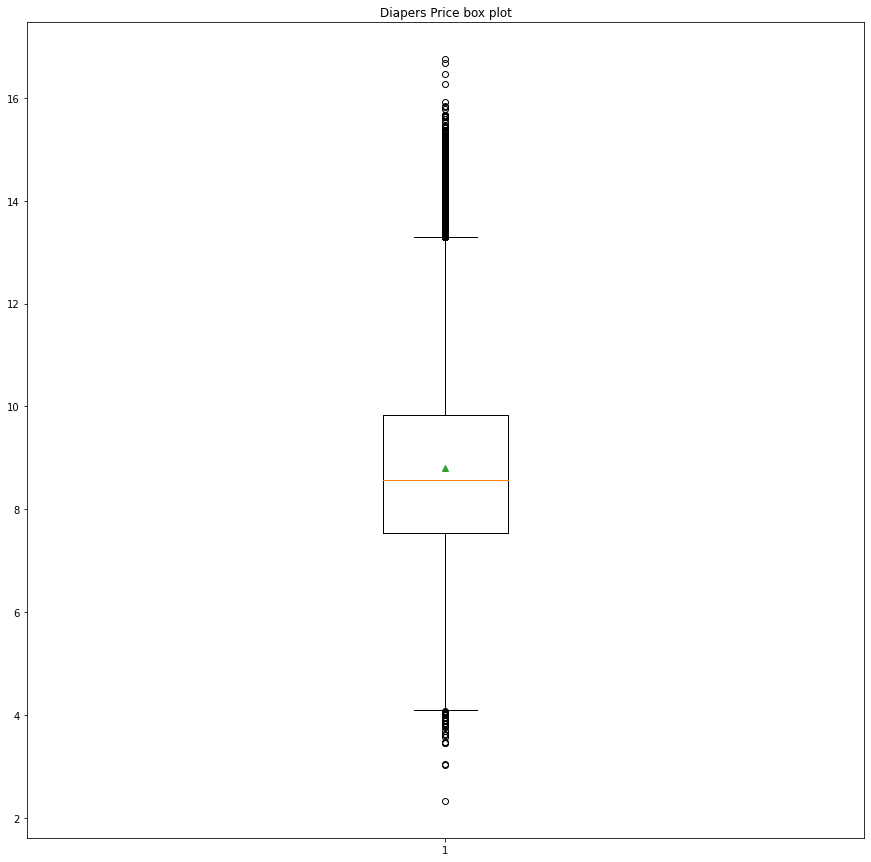

In [54]:

plt.boxplot(diapers_price, showmeans=True)
plt.title("Diapers Price box plot")
plt.show()



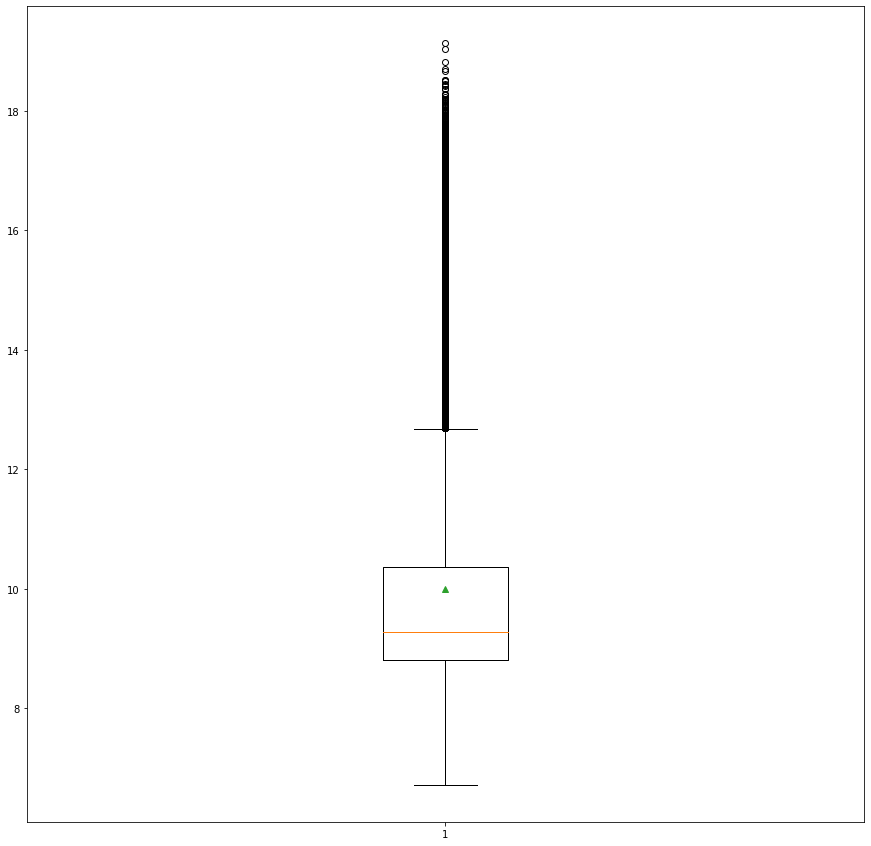

In [50]:
plt.boxplot(cereal_price, showmeans=True)
plt.title("Cereals Price box plot")
plt.show()

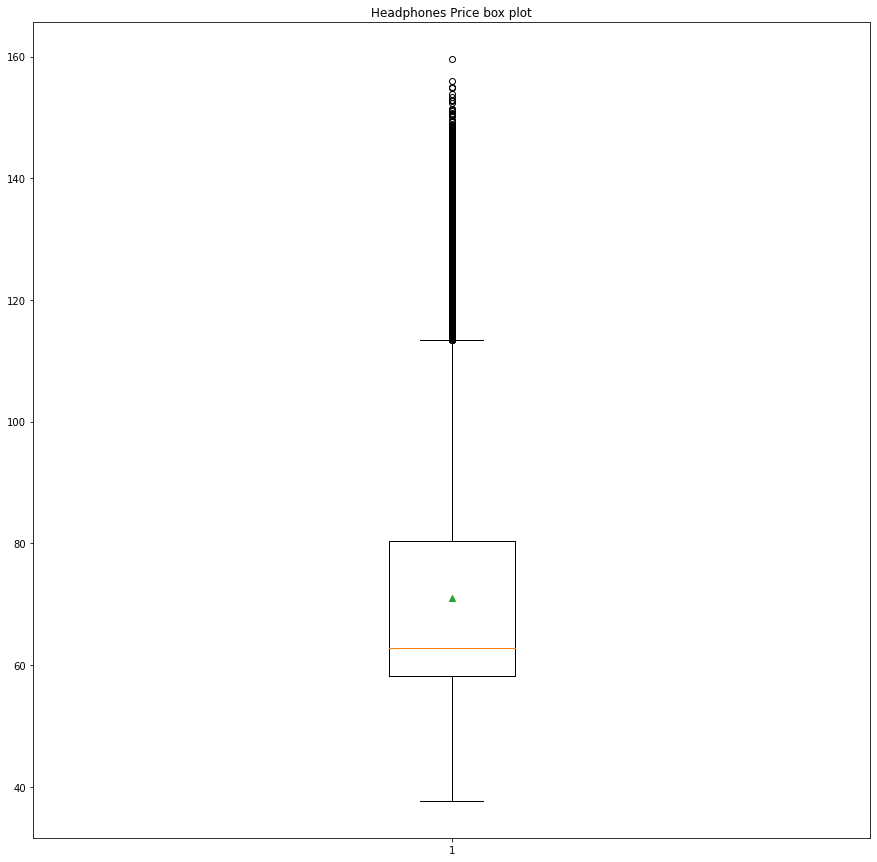

In [55]:
plt.boxplot(headphone_price, showmeans=True)
plt.title("Headphones Price box plot")
plt.show()